In [419]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
import numpy as np

In [420]:
# Set random seed for reproducibility
np.random.seed(42)  # <-- Added random seed

In [421]:
# Load dataset
df = pd.read_csv("Binary.csv")
df.head()

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,...,Feature21,Feature22,Feature23,Feature24,Feature25,Feature26,Feature27,Feature28,Feature29,target
0,-1.944044,1.891310,5.378017,-1.099764,0.319998,-0.107990,0.192998,-0.531588,-1.978358,0.505306,...,0.435838,-0.375777,-2.410484,1.307302,-0.447091,-1.205613,-0.758668,-1.115528,1.219782,1
1,0.548890,3.689146,-1.079215,-1.125497,6.892610,-0.114086,-0.129833,-4.471123,1.281707,2.509007,...,-0.515136,-1.814937,-0.659753,0.092014,1.173449,-0.887015,-0.657684,0.676340,0.379053,1
2,1.044743,2.804073,-1.779122,-0.358211,6.132624,-1.309396,-0.731316,-3.381683,-1.444734,3.028355,...,-0.928873,-1.592203,-0.389953,0.343527,0.740160,-0.244341,-1.337129,-0.168281,-0.464880,1
3,-2.848743,-2.220174,-0.498797,-0.054547,0.073406,0.927517,1.891807,-0.381548,0.017551,0.659493,...,0.662054,0.671306,-0.463003,-0.170516,0.249816,0.019505,-0.380889,-0.222127,0.364851,1
4,-0.715628,0.217362,2.032461,-0.144826,4.375660,-1.762026,1.335940,1.742721,-1.771379,0.819612,...,-0.428352,-0.511074,-0.346423,0.137622,-0.289325,-1.089344,-0.407556,-0.007071,0.117600,1


In [422]:
# Splitting features and target
X = df.drop(columns=['target'])  # Replace 'target' with actual target column name
y = df['target']

In [423]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [424]:
# Standardizing features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [425]:
print(X_train)
print(X_test)

      Feature1  Feature2  Feature3  Feature4  Feature5  Feature6  Feature7  \
210  -0.461089  0.075409  1.888977 -0.484330  0.707574 -0.188558 -2.806557   
185   5.210060 -3.111209  1.128084 -0.652360  2.044874 -1.574047  1.644005   
370  11.243971  0.480778  0.270929 -0.710973  1.890476  1.498616 -3.016179   
543  -1.522715 -0.470032  0.216200  0.189280  3.281084 -0.535764  0.675322   
396   6.250068  7.194109 -4.892123  0.045739 -0.119997 -2.542205 -1.327247   
..         ...       ...       ...       ...       ...       ...       ...   
71    2.035770  2.914155 -4.494952  0.062381 -1.598468 -0.846123 -1.723795   
106  -4.474164 -1.057187 -0.128397 -0.000579 -0.928599  0.743064 -0.191390   
270   2.313735 -3.286137 -0.815655  0.106625 -0.320584 -0.741618  0.855343   
435  -1.001063 -1.155005  1.358055  0.291555  2.218388  0.467883 -2.580336   
102  -5.536224  0.952368 -0.309354 -0.009523  1.918022  0.726667  2.548353   

     Feature8  Feature9  Feature10  ...  Feature20  Feature21  

KMeans - sklearn

In [426]:
#kmeans = KMeans(n_clusters=2, random_state=42)
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=42)
kmeans.fit(X_train)
predictions = kmeans.predict(X_test)
    
# Adjust cluster labels to match ground truth
if np.sum(predictions == y_test) < np.sum(predictions != y_test):
    predictions = 1 - predictions  # Invert labels if necessary
    
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
    
print("Final Centroids:", kmeans.cluster_centers_)
print("Cluster Assignments:", predictions)
print(f"\nAccuracy: {accuracy:.4f}")

Final Centroids: [[ 3.52442143 -0.60665474  0.12833647 -0.01104569 -0.20848902 -0.20975213
   0.08849175  0.04836243 -0.01379837 -0.0588924   0.06793345 -0.05304744
  -0.048981   -0.00590573  0.08483408  0.02480177 -0.05498668 -0.03358888
   0.06938319 -0.00466599 -0.01899761  0.05530294 -0.01613436  0.02319395
  -0.01360807 -0.0294634   0.01964017  0.03381459  0.0126604 ]
 [-3.0537729   0.28562698 -0.13902036  0.12010643  0.10665871  0.20634751
  -0.17682922 -0.03630866 -0.01042675  0.07586021 -0.08232907  0.06697149
   0.04296212 -0.02536317 -0.05238313 -0.02326053  0.0451878   0.02825553
  -0.07480348 -0.0562765   0.05716916  0.02848228  0.04317732 -0.0066191
   0.03169778  0.02906454  0.01048395 -0.01639777 -0.02318615]]
Cluster Assignments: [1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1
 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1]

Accuracy: 0.6147


In [427]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.20      0.60      0.30        15
           1       0.91      0.62      0.73        94

    accuracy                           0.61       109
   macro avg       0.55      0.61      0.52       109
weighted avg       0.81      0.61      0.67       109



Confusion Matrix: [[ 9  6]
 [36 58]]


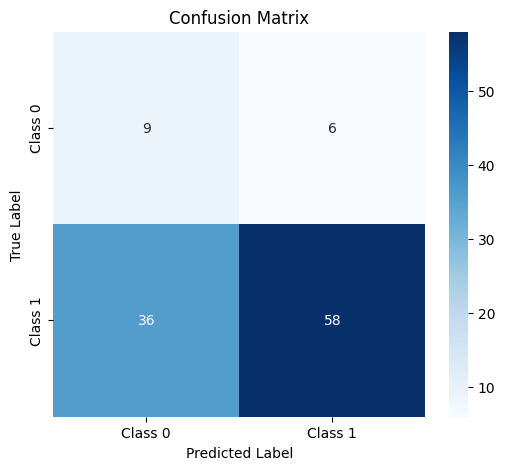

In [428]:
# Compute confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:", cm)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [429]:
# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

# Compute Sensitivity & Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Sensitivity: 0.6170
Specificity: 0.6000


c:\Users\rajit\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:479: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\rajit\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:482: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


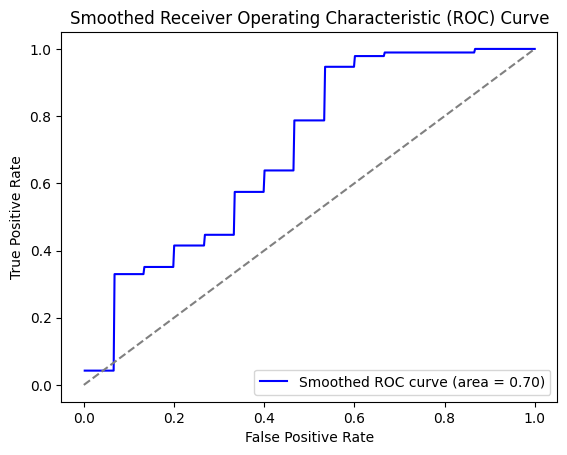

In [430]:
# Compute ROC curve
def predict_proba(X):
    X_np = X.to_numpy()  # Convert DataFrame to NumPy array
    distances = np.linalg.norm(X_np[:, np.newaxis] - kmeans.cluster_centers_, axis=2)
    inverted_distances = 1 / (1 + distances)
    smoothed_probs = inverted_distances / inverted_distances.sum(axis=1, keepdims=True)
    return smoothed_probs[:, 1]  # Probability of belonging to cluster 1


# ROC Curve with more thresholds
sklearn_probs = predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, sklearn_probs)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
from scipy.interpolate import interp1d
x_smooth = np.linspace(0, 1, 500)  # Create finer points for smoothing
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plotting the smoothed ROC Curve
plt.plot(x_smooth, tpr_smooth, color='blue', label=f'Smoothed ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Smoothed Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


KMeans - from Scratch

In [431]:
class KMeans:
    def __init__(self, n_clusters=2, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def fit(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X  # Ensure NumPy array
        np.random.seed(self.random_state)
        self.centroids = X_np[np.random.choice(X_np.shape[0], self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X_np[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            
            new_centroids = np.array([X_np[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids
    
    def predict(self, X):
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X  # Convert if necessary
        distances = np.linalg.norm(X_np[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def predict_proba(self, X):
        """ Compute pseudo-probabilities based on distance to cluster centroids """
        X_np = X.to_numpy() if isinstance(X, pd.DataFrame) else X
        distances = np.linalg.norm(X_np[:, np.newaxis] - self.centroids, axis=2)
        inv_distances = 1 / (distances + 1e-10)  # Avoid division by zero
        return inv_distances / inv_distances.sum(axis=1, keepdims=True)

In [432]:
# Apply K-Means Clustering
custom_kmeans = KMeans(n_clusters=2)
custom_kmeans.fit(X_train)
labels_train = custom_kmeans.labels_
labels_test = custom_kmeans.predict(X_test)
    
# Map cluster labels to actual target values for best accuracy
if accuracy_score(y_train, labels_train) < 0.5:
    labels_train = 1 - labels_train
    labels_test = 1 - labels_test

# Evaluate the clustering accuracy
accuracy = accuracy_score(y_test, labels_test)
print(f'Clustering Accuracy: {accuracy:.4f}')


Clustering Accuracy: 0.6147


In [433]:
print(classification_report(y_test, labels_test))

              precision    recall  f1-score   support

           0       0.20      0.60      0.30        15
           1       0.91      0.62      0.73        94

    accuracy                           0.61       109
   macro avg       0.55      0.61      0.52       109
weighted avg       0.81      0.61      0.67       109



Confusion Matrix:
 [[ 9  6]
 [36 58]]


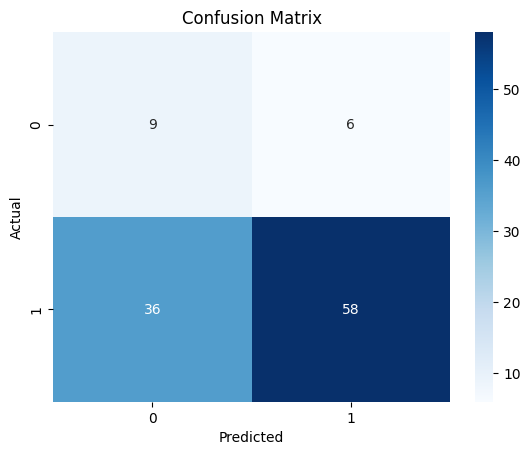

In [434]:
# Confusion Matrix
cm = confusion_matrix(y_test, labels_test)
print("Confusion Matrix:\n", cm)

#Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [435]:
# Extract TP, TN, FP, FN
TN, FP, FN, TP = cm.ravel()

# Compute Sensitivity & Specificity
sensitivity = TP / (TP + FN)
specificity = TN / (TN + FP)

print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Sensitivity: 0.6170
Specificity: 0.6000


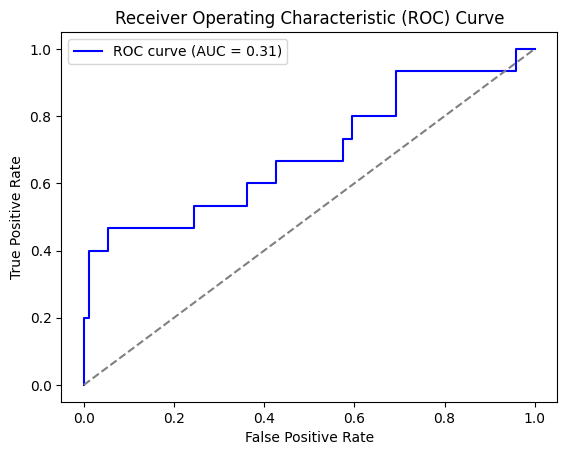

In [436]:
# Extract probabilities for the positive class
custom_probs = custom_kmeans.predict_proba(X_test)[:, 1]

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, custom_probs)
roc_auc = auc(fpr, tpr)

# Interpolating to smoothen the curve
from scipy.interpolate import interp1d
x_smooth = np.linspace(0, 1, 500)  # Create finer points for smoothing
fpr_interpolator = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")
tpr_smooth = fpr_interpolator(x_smooth)

# Plot ROC Curve
plt.plot(tpr, fpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [437]:
print("Scikit-learn probabilities:", sklearn_probs[:10])
print("Custom probabilities:", custom_probs[:10])

Scikit-learn probabilities: [0.59443831 0.58586731 0.47891459 0.44638411 0.52465638 0.59153949
 0.66311555 0.60976663 0.61920426 0.43164025]
Custom probabilities: [0.39157523 0.40039631 0.52384944 0.5592224  0.47123402 0.40028434
 0.30905139 0.37832519 0.36158231 0.57730726]
